In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv("data.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9783 entries, 0 to 9782
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                9783 non-null   object 
 1   State                  9783 non-null   object 
 2   City                   9783 non-null   object 
 3   Station                9783 non-null   object 
 4   Last Update            9783 non-null   object 
 5   AQI Value              8427 non-null   float64
 6   Predominant Parameter  8427 non-null   object 
 7   PM2.5                  8042 non-null   float64
 8   PM10                   8068 non-null   float64
 9   NO2                    8197 non-null   float64
 10  NH3                    7294 non-null   float64
 11  SO2                    8066 non-null   float64
 12  CO                     9148 non-null   float64
 13  OZONE                  8931 non-null   float64
dtypes: float64(8), object(6)
memory usage: 1.0+ MB


In [5]:
df

,Country,State,City,Station,Last Update,AQI Value,Predominant Parameter,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",20-07-2023 23:00:00,23.0,OZONE,22.0,19.0,6.0,5.0,10.0,16.0,23.0
1,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",20-07-2023 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",20-07-2023 23:00:00,40.0,OZONE,27.0,27.0,9.0,1.0,6.0,8.0,40.0
3,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",20-07-2023 23:00:00,20.0,CO,8.0,14.0,13.0,3.0,8.0,20.0,8.0
4,India,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",20-07-2023 23:00:00,45.0,PM10,22.0,45.0,28.0,2.0,5.0,17.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9778,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",07-08-2023 18:00:00,49.0,OZONE,38.0,48.0,6.0,5.0,4.0,29.0,49.0
9779,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",07-08-2023 18:00:00,47.0,OZONE,32.0,45.0,13.0,8.0,18.0,30.0,47.0
9780,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",07-08-2023 18:00:00,45.0,PM10,45.0,45.0,6.0,5.0,3.0,13.0,11.0
9781,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",07-08-2023 18:00:00,50.0,PM10,40.0,50.0,22.0,3.0,6.0,20.0,21.0


In [6]:
df=df.drop(columns=["Country","State","City","Station","Last Update","Predominant Parameter"])


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9783 entries, 0 to 9782
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AQI Value  8427 non-null   float64
 1   PM2.5      8042 non-null   float64
 2   PM10       8068 non-null   float64
 3   NO2        8197 non-null   float64
 4   NH3        7294 non-null   float64
 5   SO2        8066 non-null   float64
 6   CO         9148 non-null   float64
 7   OZONE      8931 non-null   float64
dtypes: float64(8)
memory usage: 611.6 KB
None


In [8]:
df.describe()

,AQI Value,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
count,8427.000000,8042.000000,8068.000000,8197.000000,7294.000000,8066.000000,9148.000000,8931.000000
mean,64.466002,38.748446,56.911006,19.489325,5.384426,12.792214,31.523721,25.707648
std,35.445684,27.070383,31.645379,22.672150,5.392379,13.417941,23.902127,21.175002
min,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,41.000000,22.000000,36.000000,9.000000,2.000000,4.000000,16.000000,12.000000
50%,57.000000,33.000000,51.000000,14.000000,4.000000,9.000000,24.000000,21.000000
75%,80.000000,49.000000,73.000000,24.000000,7.000000,16.750000,41.000000,34.000000
max,500.000000,500.000000,500.000000,299.000000,82.000000,133.000000,214.000000,304.000000


In [9]:
df.head()

,AQI Value,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,23.0,22.0,19.0,6.0,5.0,10.0,16.0,23.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.0,27.0,27.0,9.0,1.0,6.0,8.0,40.0
3,20.0,8.0,14.0,13.0,3.0,8.0,20.0,8.0
4,45.0,22.0,45.0,28.0,2.0,5.0,17.0,36.0


In [10]:
df.isna().sum()

AQI Value    1356
PM2.5        1741
PM10         1715
NO2          1586
NH3          2489
SO2          1717
CO            635
OZONE         852
dtype: int64

In [11]:
df.tail()

,AQI Value,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
9778,49.0,38.0,48.0,6.0,5.0,4.0,29.0,49.0
9779,47.0,32.0,45.0,13.0,8.0,18.0,30.0,47.0
9780,45.0,45.0,45.0,6.0,5.0,3.0,13.0,11.0
9781,50.0,40.0,50.0,22.0,3.0,6.0,20.0,21.0
9782,40.0,35.0,40.0,21.0,11.0,7.0,24.0,30.0


In [12]:
columnscv=df.columns.tolist()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9783 entries, 0 to 9782
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AQI Value  8427 non-null   float64
 1   PM2.5      8042 non-null   float64
 2   PM10       8068 non-null   float64
 3   NO2        8197 non-null   float64
 4   NH3        7294 non-null   float64
 5   SO2        8066 non-null   float64
 6   CO         9148 non-null   float64
 7   OZONE      8931 non-null   float64
dtypes: float64(8)
memory usage: 611.6 KB


In [14]:
df = df.dropna(subset=['AQI Value'])
df.describe()

,AQI Value,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
count,8427.000000,8034.000000,8054.000000,7918.000000,7032.000000,7785.000000,8113.000000,7926.000000
mean,64.466002,38.732636,56.924261,19.640313,5.429892,12.691329,31.114754,25.926571
std,35.445684,27.045433,31.656592,22.859842,5.432502,13.380659,23.388469,21.014987
min,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,41.000000,22.000000,36.000000,9.000000,2.000000,4.000000,16.000000,13.000000
50%,57.000000,33.000000,51.000000,14.000000,4.000000,8.000000,24.000000,21.000000
75%,80.000000,49.000000,73.000000,24.000000,7.000000,16.000000,40.000000,34.000000
max,500.000000,500.000000,500.000000,299.000000,82.000000,133.000000,196.000000,301.000000


In [15]:
df.isna().sum()

AQI Value       0
PM2.5         393
PM10          373
NO2           509
NH3          1395
SO2           642
CO            314
OZONE         501
dtype: int64

In [16]:
df

,AQI Value,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,23.0,22.0,19.0,6.0,5.0,10.0,16.0,23.0
2,40.0,27.0,27.0,9.0,1.0,6.0,8.0,40.0
3,20.0,8.0,14.0,13.0,3.0,8.0,20.0,8.0
4,45.0,22.0,45.0,28.0,2.0,5.0,17.0,36.0
5,73.0,73.0,59.0,NaN,NaN,7.0,16.0,9.0
...,...,...,...,...,...,...,...,...
9778,49.0,38.0,48.0,6.0,5.0,4.0,29.0,49.0
9779,47.0,32.0,45.0,13.0,8.0,18.0,30.0,47.0
9780,45.0,45.0,45.0,6.0,5.0,3.0,13.0,11.0
9781,50.0,40.0,50.0,22.0,3.0,6.0,20.0,21.0


In [17]:
for i in columnscv[0:8]:
    df[i].fillna(df[i].mean(),inplace=True)

In [18]:
df = df.dropna(subset=['AQI Value'], axis=0)
df.columns

Index(['AQI Value', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype='object')

In [19]:
df.isna().sum()
df.corr()["AQI Value"]

AQI Value    1.000000
PM2.5        0.653473
PM10         0.782087
NO2          0.415872
NH3          0.214466
SO2          0.181759
CO           0.421512
OZONE        0.296902
Name: AQI Value, dtype: float64

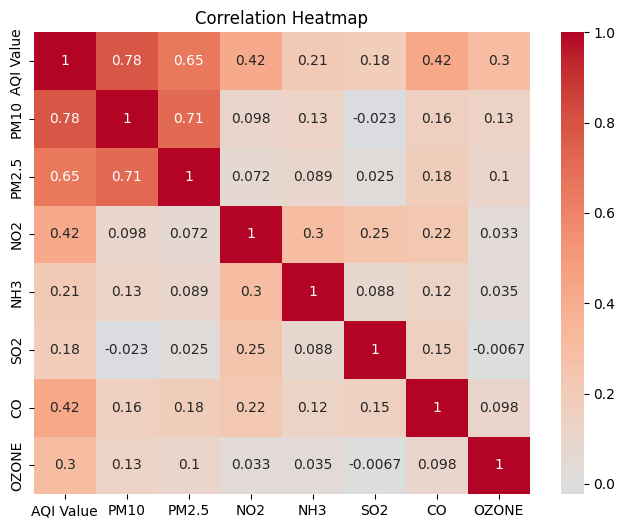

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

independent_variables = ['AQI Value', 'PM10', 'PM2.5', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']

correlation_matrix = df[independent_variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


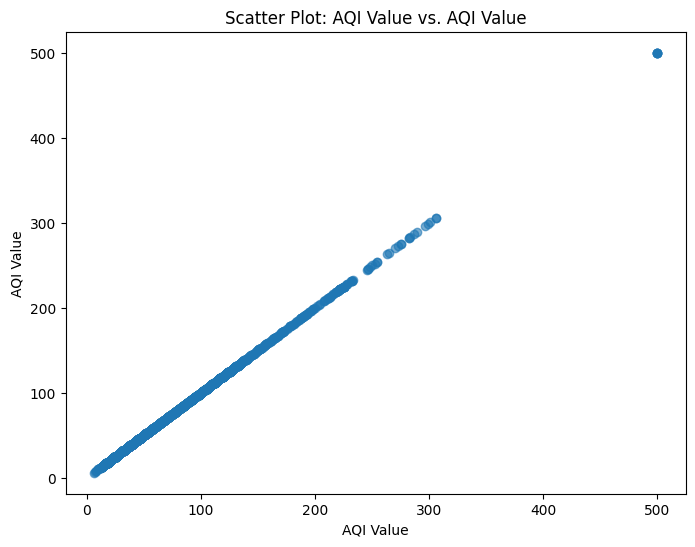

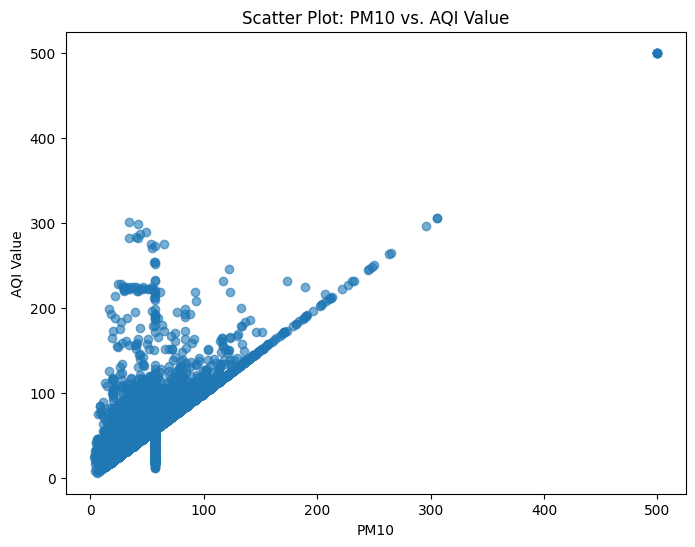

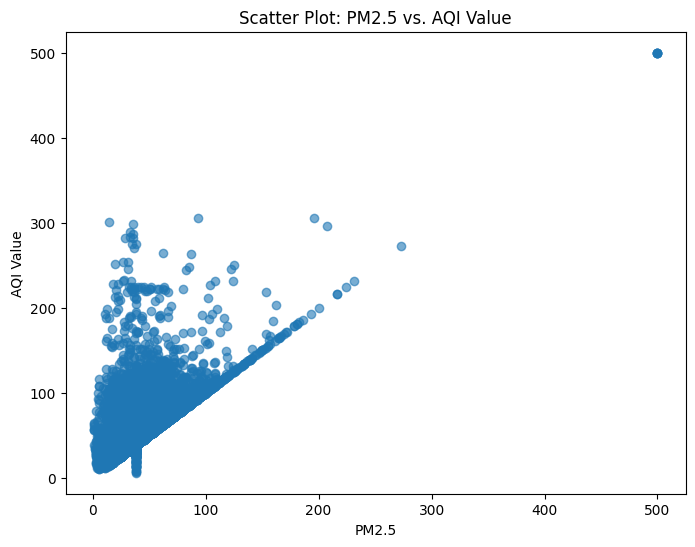

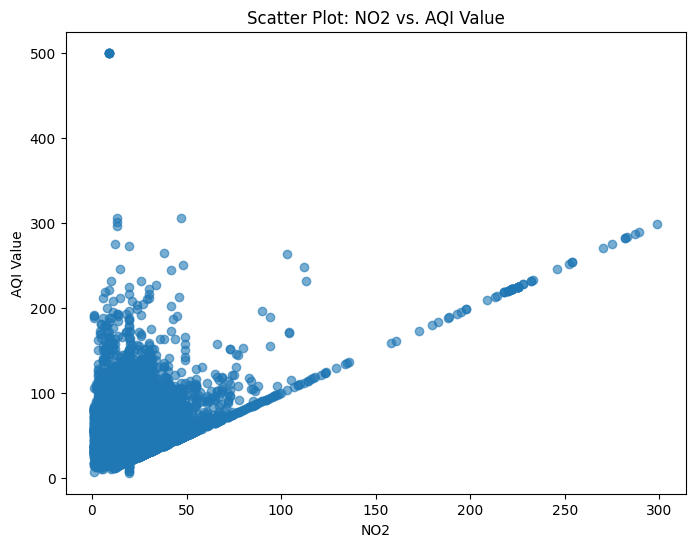

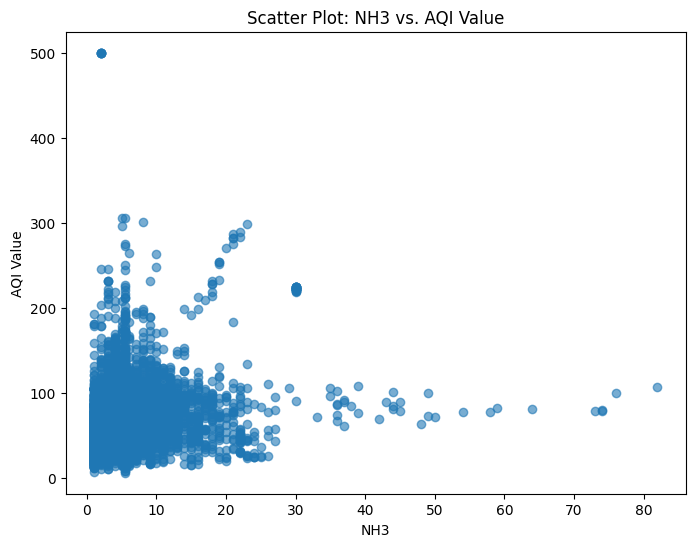

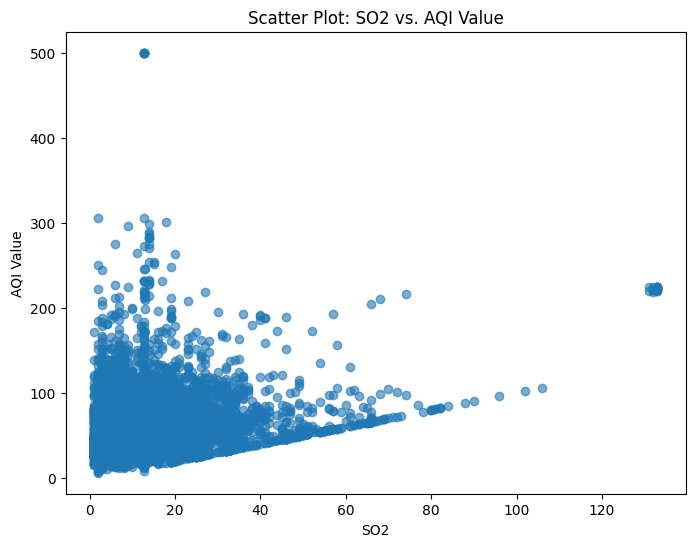

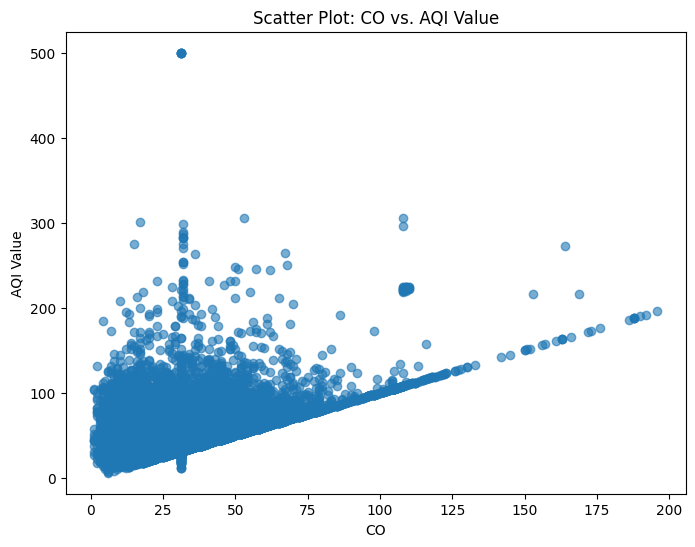

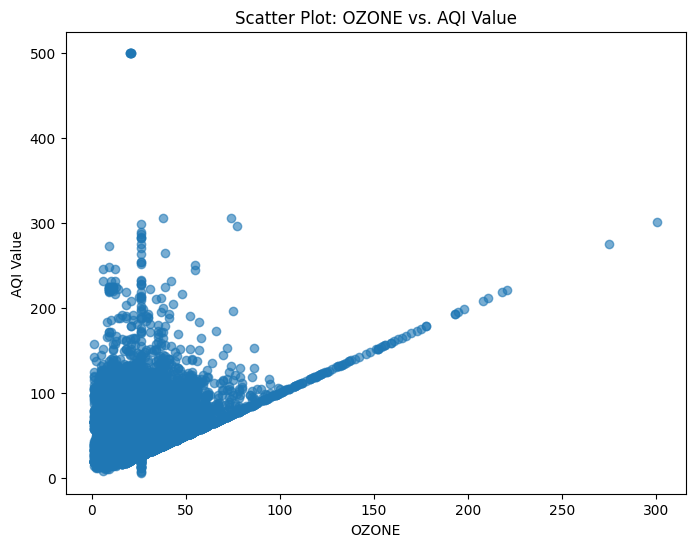

In [21]:

for variable in independent_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[variable], df['AQI Value'], alpha=0.6)
    plt.xlabel(variable)
    plt.ylabel('AQI Value')
    plt.title(f'Scatter Plot: {variable} vs. AQI Value')
    plt.show()

In [22]:
df

,AQI Value,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,23.0,22.0,19.0,6.000000,5.000000,10.0,16.0,23.0
2,40.0,27.0,27.0,9.000000,1.000000,6.0,8.0,40.0
3,20.0,8.0,14.0,13.000000,3.000000,8.0,20.0,8.0
4,45.0,22.0,45.0,28.000000,2.000000,5.0,17.0,36.0
5,73.0,73.0,59.0,19.640313,5.429892,7.0,16.0,9.0
...,...,...,...,...,...,...,...,...
9778,49.0,38.0,48.0,6.000000,5.000000,4.0,29.0,49.0
9779,47.0,32.0,45.0,13.000000,8.000000,18.0,30.0,47.0
9780,45.0,45.0,45.0,6.000000,5.000000,3.0,13.0,11.0
9781,50.0,40.0,50.0,22.000000,3.000000,6.0,20.0,21.0


In [23]:
x=df.iloc[:,1:8].values

target = df["AQI Value"]
skewness = target.skew()


In [24]:

y=df.iloc[:,:-7].values

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(
    df[[i for i in df.columns if i not in ["AQI Value"]]], 
    df["AQI Value"], 
    test_size=0.3, 
    random_state=100
    )


In [27]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

ypred = linreg.predict(xtest)

print("Linear Regression Model:")
print(f"MAE: {mae(ytest, ypred)}")
print(f"MSE: {mse(ytest, ypred)}")
print(f"R-squared: {r2_score(ytest, ypred)}")

accuracy = accuracy_score(ytest, np.round(ypred))
precision = precision_score(ytest, np.round(ypred), average='weighted')
recall = recall_score(ytest, np.round(ypred), average='weighted')
f1 = f1_score(ytest, np.round(ypred), average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Linear Regression Model:
MAE: 9.824593042437064
MSE: 217.5509732185059
R-squared: 0.8431099829557958
Accuracy: 0.04191379992091736
Precision: 0.0466775317235584
Recall: 0.04191379992091736
F1 Score: 0.04324186955542973


In [28]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(xtrain, ytrain)

ypred_dt = dt_reg.predict(xtest)

print("Decision Tree Regressor:")
print(f"MAE: {mae(ytest, ypred_dt)}")
print(f"MSE: {mse(ytest, ypred_dt)}")
print(f"R-squared: {r2_score(ytest, ypred_dt)}")


Decision Tree Regressor:
MAE: 1.0344009489916963
MSE: 23.983392645314353
R-squared: 0.9827040310358808


In [29]:

rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(xtrain, ytrain)

ypred_rf = rf_reg.predict(xtest)

print("\nRandom Forest Regressor:")
print(f"MAE: {mae(ytest, ypred_rf)}")
print(f"MSE: {mse(ytest, ypred_rf)}")
print(f"R-squared: {r2_score(ytest, ypred_rf)}")



Random Forest Regressor:
MAE: 0.909984183471728
MSE: 19.672511466982996
R-squared: 0.9858128850738015


In [30]:

gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_reg.fit(xtrain, ytrain)

ypred_gb = gb_reg.predict(xtest)

print("\nGradient Boosting Regressor:")
print(f"MAE: {mae(ytest, ypred_gb)}")
print(f"MSE: {mse(ytest, ypred_gb)}")
print(f"R-squared: {r2_score(ytest, ypred_gb)}")


Gradient Boosting Regressor:
MAE: 3.229202000516412
MSE: 29.93367264252756
R-squared: 0.9784129009325788


In [31]:
svr_reg = SVR()
svr_reg.fit(xtrain, ytrain)
y_pred_svr = svr_reg.predict(xtest)
print("\nSupport Vector Regression (SVR):")
print(f"MAE: {mae(ytest, y_pred_svr)}")
print(f"MSE: {mse(ytest, y_pred_svr)}")
print(f"R-squared: {r2_score(ytest, y_pred_svr)}")


Support Vector Regression (SVR):
MAE: 5.071143572878241
MSE: 374.224046557837
R-squared: 0.7301229400438471


In [32]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(xtrain, ytrain)
y_pred_knn = knn_reg.predict(xtest)
print("\nK-Nearest Neighbors (KNN) Regressor:")
print(f"MAE: {mae(ytest, y_pred_knn)}")
print(f"MSE: {mse(ytest, y_pred_knn)}")
print(f"R-squared: {r2_score(ytest, y_pred_knn)}")


K-Nearest Neighbors (KNN) Regressor:
MAE: 3.042546461051799
MSE: 31.79310399367339
R-squared: 0.9770719452381137


In [33]:
xgb_reg = XGBRegressor(n_estimators=100, random_state=0)
xgb_reg.fit(xtrain, ytrain)
y_pred_xgb = xgb_reg.predict(xtest)
print("XGBoost Regression:")
print(f"MAE: {mae(ytest, y_pred_xgb)}")
print(f"MSE: {mse(ytest, y_pred_xgb)}")
print(f"R-squared: {r2_score(ytest, y_pred_xgb)}")

XGBoost Regression:
MAE: 1.4588535062971677
MSE: 13.247501535029615
R-squared: 0.990446373505595


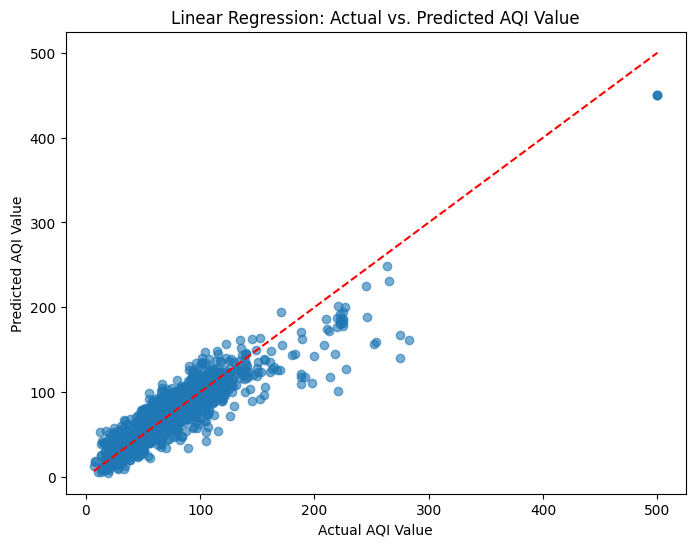

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Linear Regression: Actual vs. Predicted AQI Value')
plt.show()


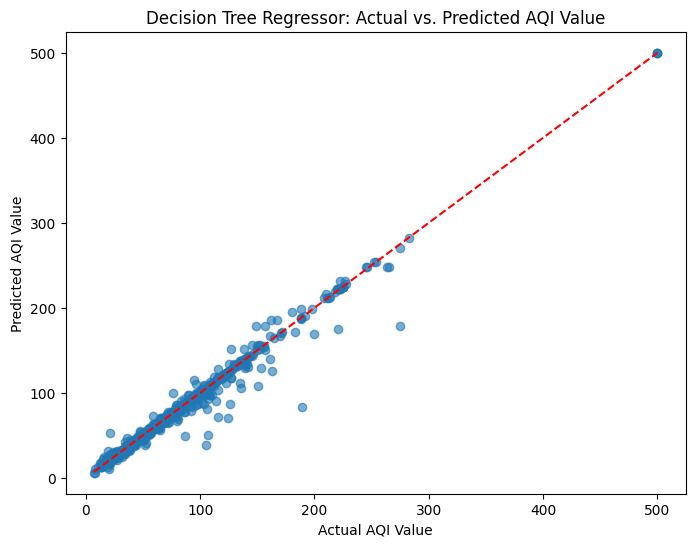

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_dt, alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Decision Tree Regressor: Actual vs. Predicted AQI Value')
plt.show()

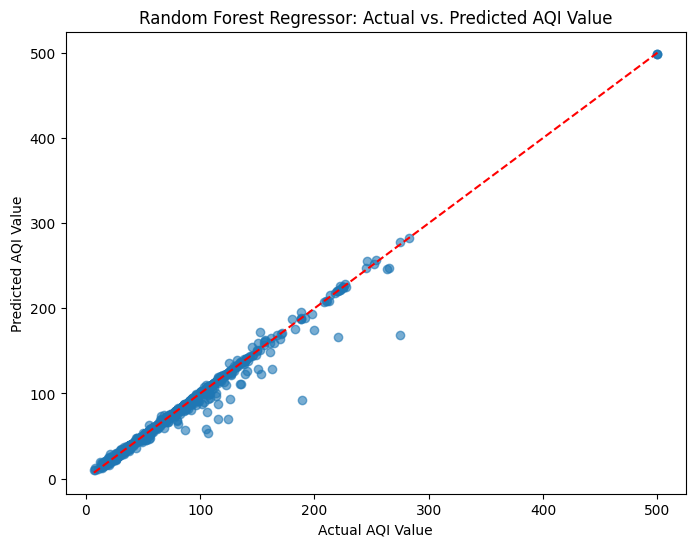

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_rf, alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Random Forest Regressor: Actual vs. Predicted AQI Value')
plt.show()

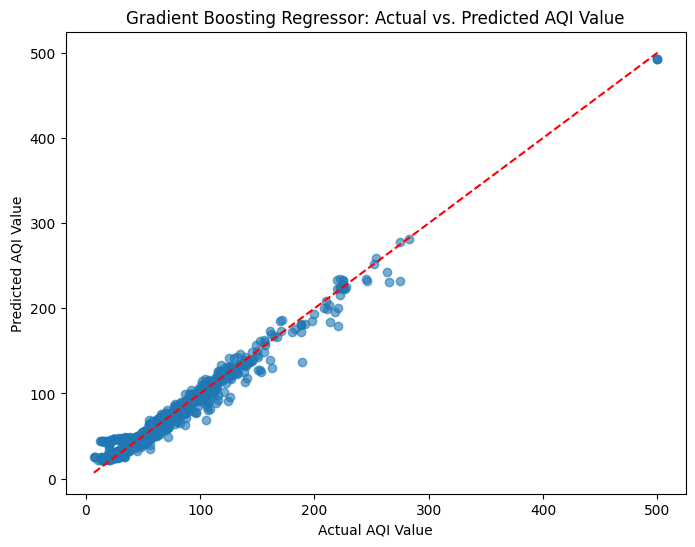

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_gb, alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Gradient Boosting Regressor: Actual vs. Predicted AQI Value')
plt.show()

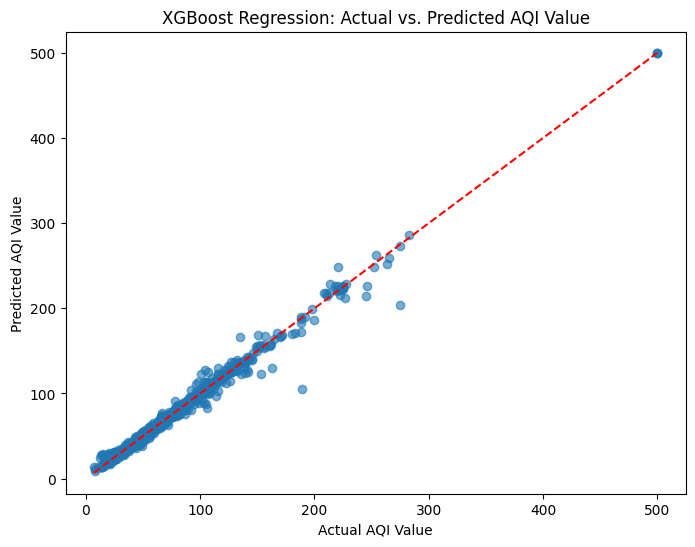

In [38]:

plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_xgb, alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('XGBoost Regression: Actual vs. Predicted AQI Value')
plt.show()

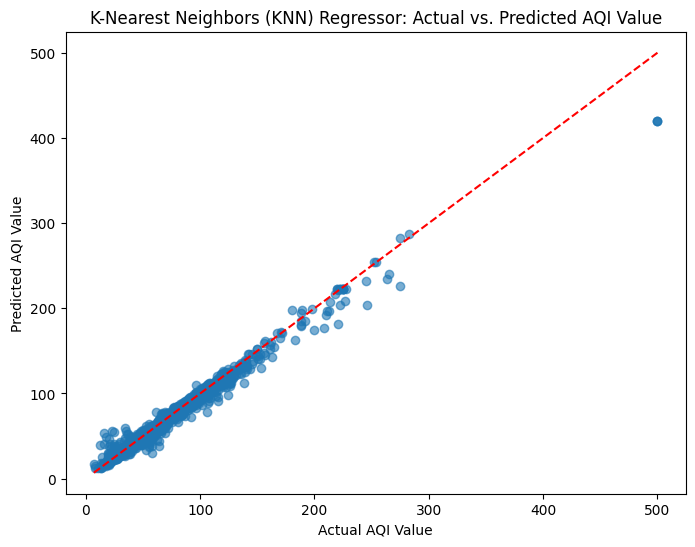

In [39]:

plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_knn, alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('K-Nearest Neighbors (KNN) Regressor: Actual vs. Predicted AQI Value')
plt.show()


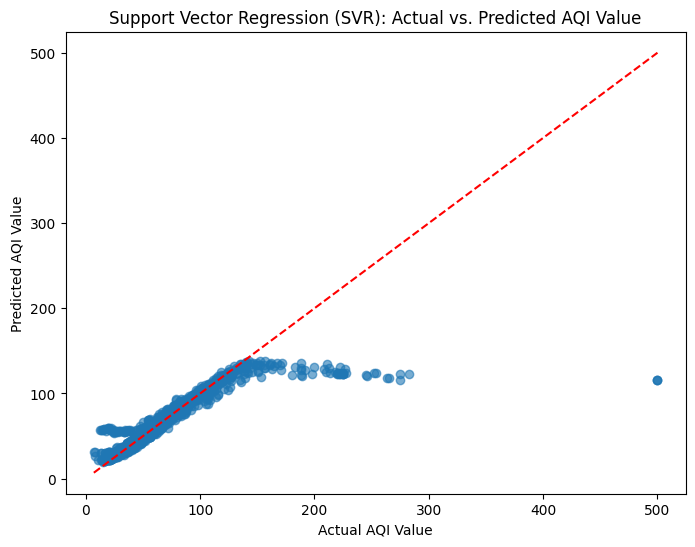

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_svr, alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Support Vector Regression (SVR): Actual vs. Predicted AQI Value')
plt.show()

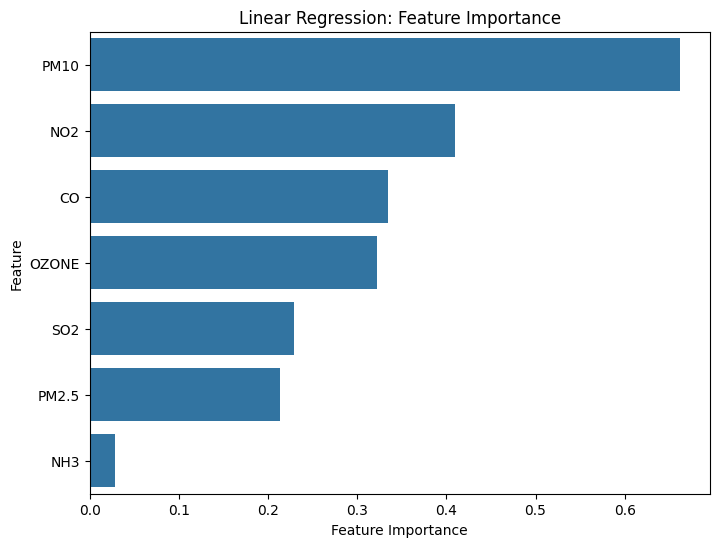

In [41]:
feature_importance_linreg = linreg.coef_
importance_linreg_df = pd.DataFrame({'Feature': df.drop(columns=["AQI Value"]).columns,
                                     'Importance_LinReg': feature_importance_linreg})

importance_linreg_df['Importance_LinReg'] = abs(importance_linreg_df['Importance_LinReg'])
importance_linreg_df = importance_linreg_df.sort_values(by='Importance_LinReg', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance_LinReg', y='Feature', data=importance_linreg_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Linear Regression: Feature Importance')
plt.show()

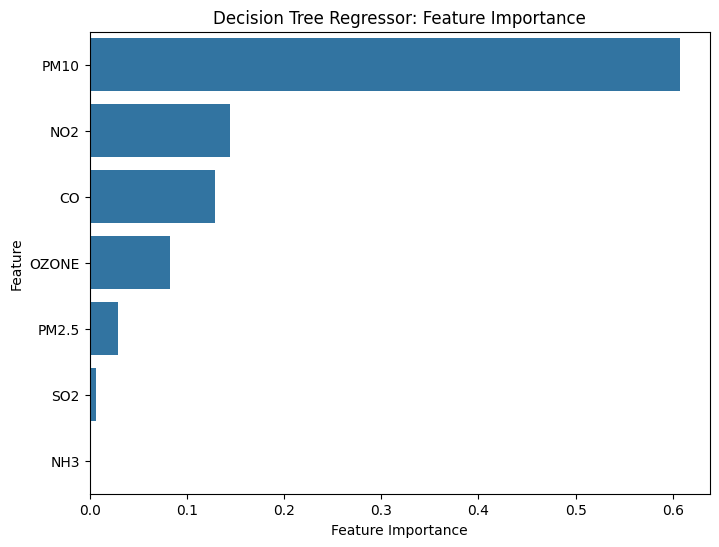

In [42]:
feature_importance_dt = dt_reg.feature_importances_

importance_dt_df = pd.DataFrame({'Feature': df.drop(columns=["AQI Value"]).columns,
                                 'Importance_DT': feature_importance_dt})

importance_dt_df = importance_dt_df.sort_values(by='Importance_DT', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance_DT', y='Feature', data=importance_dt_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor: Feature Importance')
plt.show()

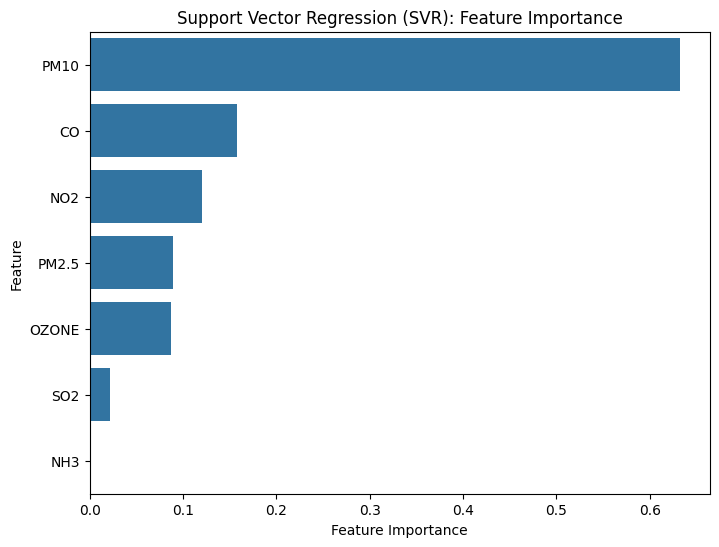

In [43]:
from sklearn.inspection import permutation_importance

svr_reg = SVR()
svr_reg.fit(xtrain, ytrain)

perm_importance = permutation_importance(svr_reg, xtest, ytest, n_repeats=30, random_state=0)

svr_df = pd.DataFrame({'Feature': df.drop(columns=["AQI Value"]).columns,
                       'Feature_Importance': perm_importance.importances_mean})

svr_df = svr_df.sort_values(by='Feature_Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Feature_Importance', y='Feature', data=svr_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Support Vector Regression (SVR): Feature Importance')
plt.show()



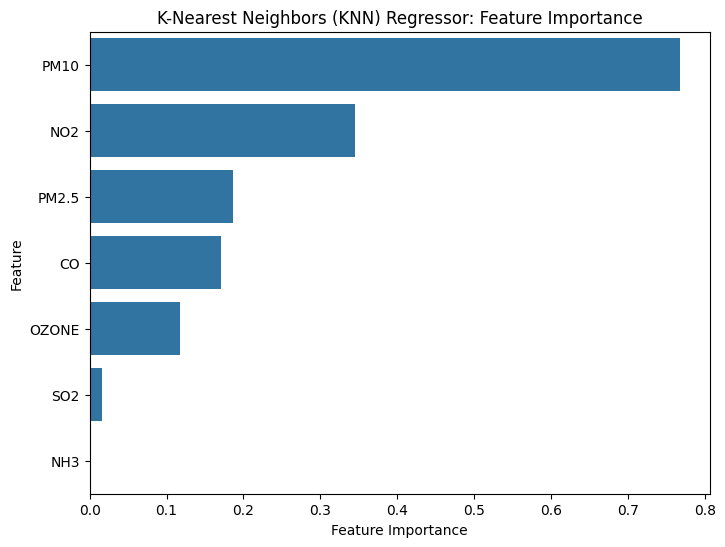

In [44]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(knn_reg, xtest, ytest, n_repeats=30, random_state=0)

knn_df = pd.DataFrame({'Feature': df.drop(columns=["AQI Value"]).columns,
                       'Feature_Importance': perm_importance.importances_mean})

knn_df = knn_df.sort_values(by='Feature_Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Feature_Importance', y='Feature', data=knn_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('K-Nearest Neighbors (KNN) Regressor: Feature Importance')
plt.show()

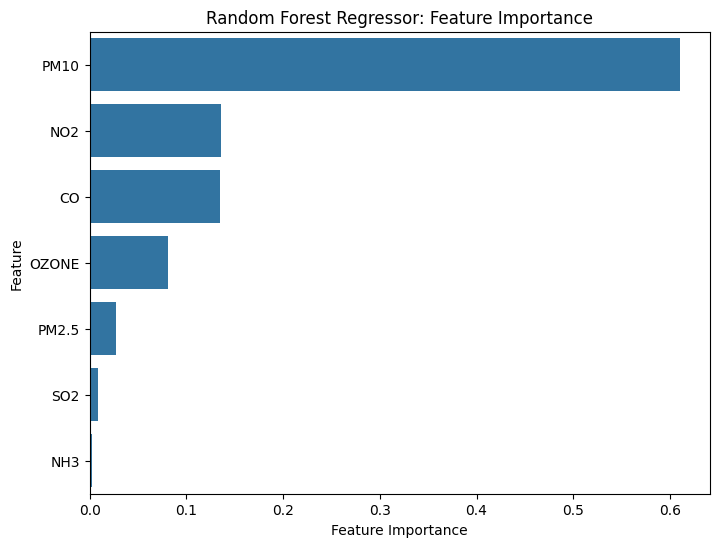

In [45]:
feature_importance_rf = rf_reg.feature_importances_

importance_rf_df = pd.DataFrame({'Feature': df.drop(columns=["AQI Value"]).columns,
                                  'Importance_RF': feature_importance_rf})

importance_rf_df = importance_rf_df.sort_values(by='Importance_RF', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance_RF', y='Feature', data=importance_rf_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor: Feature Importance')
plt.show()

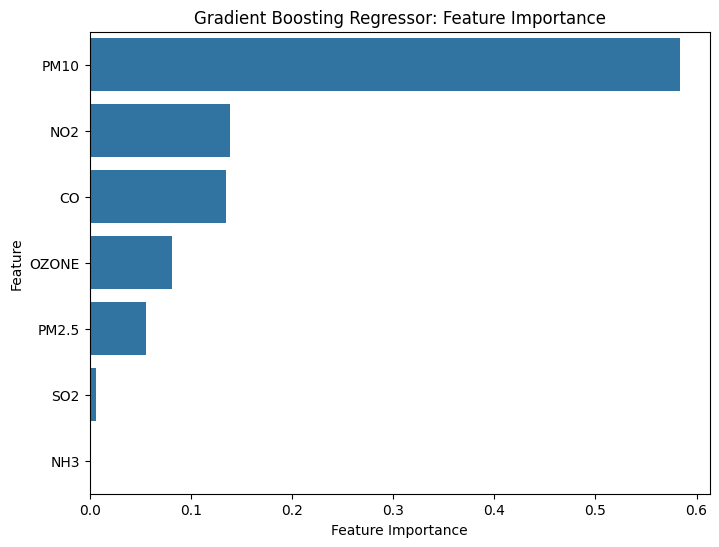

In [46]:
feature_importance_gb = gb_reg.feature_importances_

importance_gb_df = pd.DataFrame({'Feature': df.drop(columns=["AQI Value"]).columns,
                                 'Importance_GB': feature_importance_gb})

importance_gb_df = importance_gb_df.sort_values(by='Importance_GB', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance_GB', y='Feature', data=importance_gb_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor: Feature Importance')
plt.show()

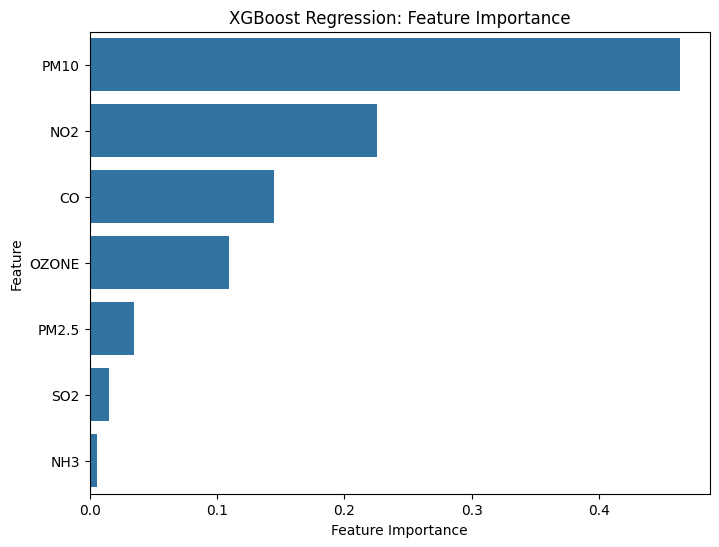

In [47]:
feature_importance_xgb = xgb_reg.feature_importances_

importance_xgb_df = pd.DataFrame({'Feature': df.drop(columns=["AQI Value"]).columns,
                                  'Importance_XGB': feature_importance_xgb})

importance_xgb_df = importance_xgb_df.sort_values(by='Importance_XGB', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance_XGB', y='Feature', data=importance_xgb_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Regression: Feature Importance')
plt.show()

In [64]:
ypred_rf_sample = rf_reg.predict([[22,19,6,5,10,16,23]])
ypred_rf_sample

array([23.03])

In [49]:
import pickle

file_path = "random_forest_model.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(rf_reg, file)

print("Random Forest Regressor model saved successfully!")


Random Forest Regressor model saved successfully!


In [50]:

file_path = "linear_regression.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(linreg, file)

print("linear regression model saved successfully!")


linear regression model saved successfully!


In [51]:
import pickle

file_path = "Decision_tree_model.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(dt_reg, file)

print("Decision Tree Regressor model saved successfully!")

Decision Tree Regressor model saved successfully!


In [52]:
import pickle

file_path = "Gradient_boost_model.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(gb_reg, file)

print("Gradient Boosting Regressor model saved successfully!")

Gradient Boosting Regressor model saved successfully!


In [53]:
import pickle

file_path = "KNN_model.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(knn_reg, file)

print("K-Nearest Neighbors (KNN) Regressor model saved successfully!")

K-Nearest Neighbors (KNN) Regressor model saved successfully!


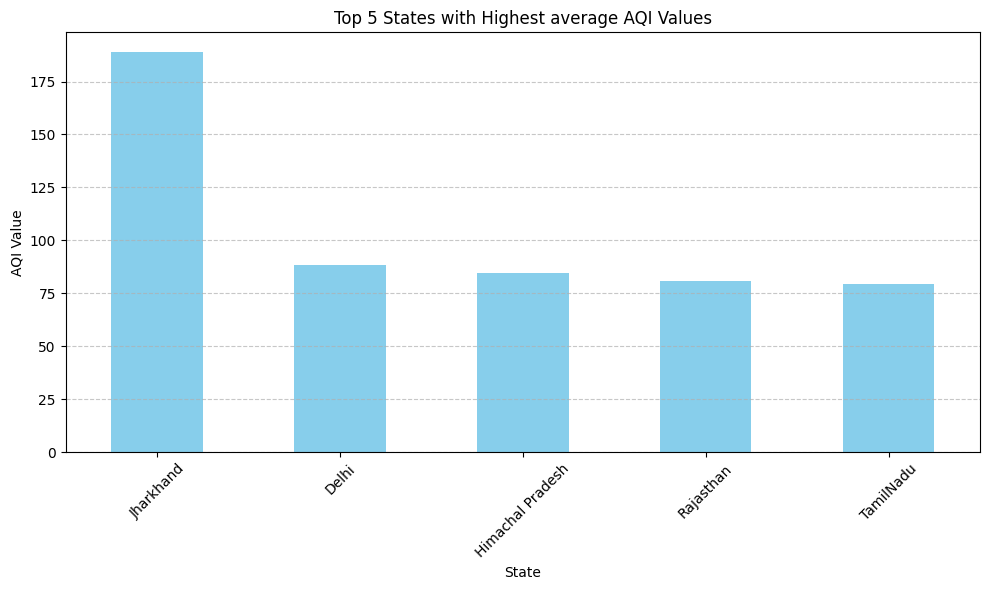

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data = pd.read_csv('data.csv')
top_5_states = data.groupby('State')['AQI Value'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States with Highest average AQI Values')
plt.xlabel('State')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()



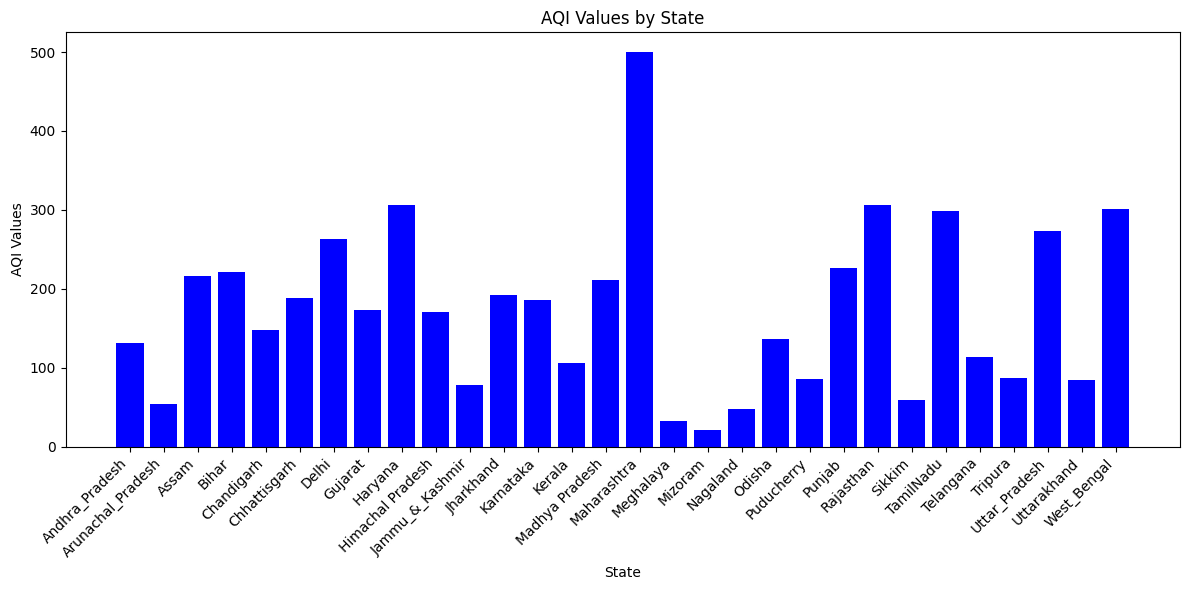

In [56]:

state = data['State']
aqi_values = data['AQI Value']

plt.figure(figsize=(12, 6))  
plt.bar(state, aqi_values, color='blue')
plt.xlabel('State')
plt.ylabel('AQI Values')
plt.title('AQI Values by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [57]:


param_counts_by_state = data.groupby(['State', 'Predominant Parameter']).size().reset_index(name='Count')
idx = param_counts_by_state.groupby('State')['Count'].transform(max) == param_counts_by_state['Count']
predominant_params = param_counts_by_state[idx]
print("Most Predominant Parameters in each state:")
print(predominant_params)


Most Predominant Parameters in each state:
                 State Predominant Parameter  Count
3       Andhra_Pradesh                  PM10     89
6    Arunachal_Pradesh                  PM10      7
11               Assam                  PM10     74
17               Bihar                  PM10    275
22          Chandigarh                  PM10     29
27        Chhattisgarh                  PM10    105
32               Delhi                  PM10    483
37             Gujarat                  PM10    150
43             Haryana                  PM10    255
47    Himachal Pradesh                  PM10     18
48     Jammu_&_Kashmir                  PM10     12
49           Jharkhand                    CO      5
54           Karnataka                  PM10    356
59              Kerala                  PM10     52
64      Madhya Pradesh                  PM10    243
71         Maharashtra                  PM10    938
75           Meghalaya                   SO2     22
77             Mizora

In [58]:
pm10_states = predominant_params[predominant_params['Predominant Parameter'] == 'PM10']
print("States where PM10 is the most predominant parameter:")
print(pm10_states[['State', 'Count']])


States where PM10 is the most predominant parameter:
                 State  Count
3       Andhra_Pradesh     89
6    Arunachal_Pradesh      7
11               Assam     74
17               Bihar    275
22          Chandigarh     29
27        Chhattisgarh    105
32               Delhi    483
37             Gujarat    150
43             Haryana    255
47    Himachal Pradesh     18
48     Jammu_&_Kashmir     12
54           Karnataka    356
59              Kerala     52
64      Madhya Pradesh    243
71         Maharashtra    938
77             Mizoram     14
82              Odisha    101
86          Puducherry     20
90              Punjab    107
95           Rajasthan    659
101          TamilNadu    186
107          Telangana    158
113      Uttar_Pradesh    683
118        Uttarakhand     28
122        West_Bengal    175


In [59]:
pm10_states_sorted = pm10_states.sort_values(by='Count', ascending=False)
print("Top 5 states where PM10 is the most predominant parameter:")
print(pm10_states_sorted.head(5)[['State', 'Count']])



Top 5 states where PM10 is the most predominant parameter:
             State  Count
71     Maharashtra    938
113  Uttar_Pradesh    683
95       Rajasthan    659
32           Delhi    483
54       Karnataka    356


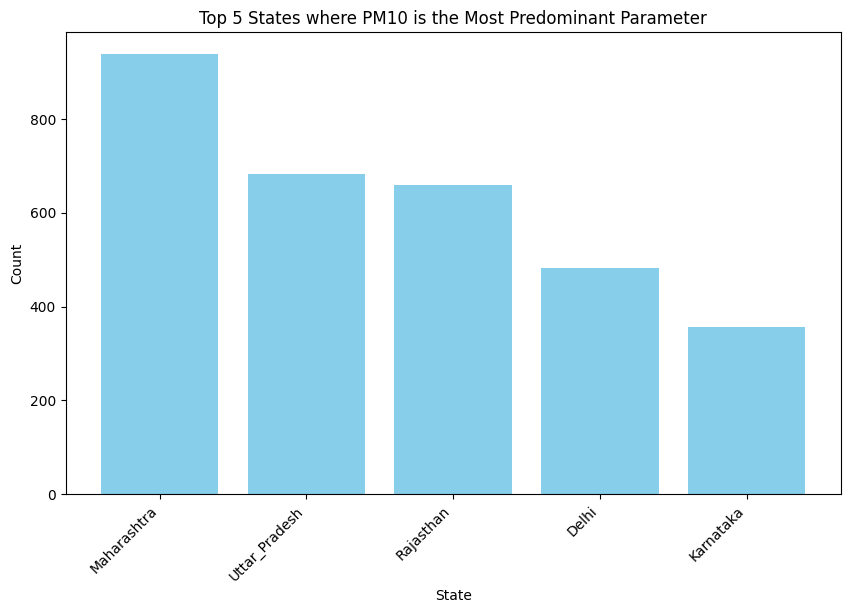

In [60]:

plt.figure(figsize=(10, 6))
plt.bar(pm10_states_sorted.head(5)['State'], pm10_states_sorted.head(5)['Count'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 5 States where PM10 is the Most Predominant Parameter')
plt.xticks(rotation=45, ha='right')  
plt.show()


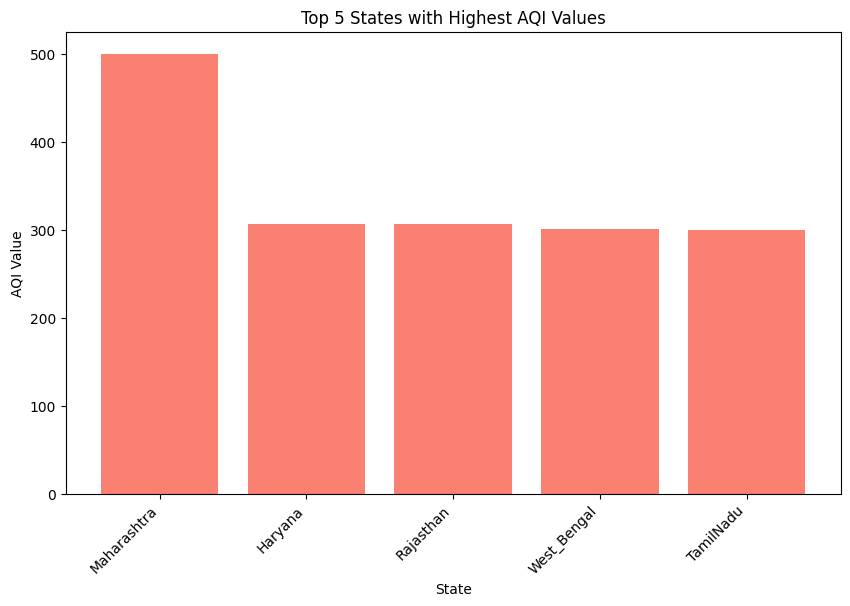

In [62]:

top_aqi_states = data.groupby('State')['AQI Value'].max().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_aqi_states.index, top_aqi_states.values, color='salmon')
plt.xlabel('State')
plt.ylabel('AQI Value')
plt.title('Top 5 States with Highest AQI Values')
plt.xticks(rotation=45, ha='right')  
plt.show()


In [63]:
top_aqi_states

State
Maharashtra    500.0
Haryana        306.0
Rajasthan      306.0
West_Bengal    301.0
TamilNadu      299.0
Name: AQI Value, dtype: float64